In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
data_tables1=pd.read_csv('/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_revisions/Table_S1_revised_180420.csv', header=0)
data_table2=pd.read_csv('/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_revisions/Table_2_revised_180420.csv', header=0)
data_ss1=pd.read_csv('/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_revisions/L_vs_Dpar.csv', header=0)


In [3]:
samples_t2=np.unique(data_table2.Sample_N)
samples_s1=np.unique(data_tables1.SampleID)

In [4]:
cmap = plt.get_cmap('nipy_spectral')
norm = mcolors.Normalize(vmin=0, vmax=(len(samples_t2))-1)

timestep=np.arange(0,len(samples_t2),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c=cmap(norm(timestep))

# Intersample correlation

In [5]:
#Central Age
xmeaneU=np.zeros(len(samples_s1))
yAFT=np.zeros(len(samples_t2))

for i in np.arange(0,len(samples_t2),1):
    xmeaneU[i]=np.mean(data_tables1.eU_ppm[data_tables1.SampleID==samples_s1[i]])
    yAFT[i]=data_table2.Central_age_Ma[data_table2.Sample_N==samples_t2[i]]    
round(scipy.stats.linregress(xmeaneU,yAFT)[2]**2,2)

#MTL
yMTL=np.zeros(len(samples_t2))

for i in np.arange(0,len(samples_t2),1):
    yMTL[i]=data_table2.Mean_track_length_um[data_table2.Sample_N==samples_t2[i]]    
round(scipy.stats.linregress(xmeaneU,yMTL)[2]**2,2)

#Dpar
yDpar=np.zeros(len(samples_t2))

for i in np.arange(0,len(samples_t2),1):
    yDpar[i]=data_table2.Dpar_um[data_table2.Sample_N==samples_t2[i]]    
round(scipy.stats.linregress(xmeaneU,yDpar)[2]**2,2)


0.81

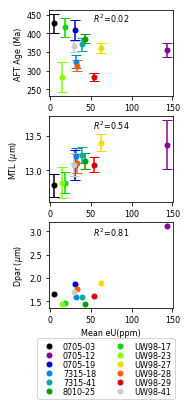

In [6]:
fig, axs = plt.subplots(3,1, figsize=(6/2.5, (23/2)/2.5))

lfs=8
lbp=0
lls=0.00001
ls=8
ms=5
###
ax = axs[0]
for i in np.arange(0,len(samples_t2),1):
    ax.errorbar(np.mean(data_tables1.eU_ppm[data_tables1.SampleID==samples_s1[i]]),
                data_table2.Central_age_Ma[data_table2.Sample_N==samples_t2[i]],
                yerr=data_table2.Central_age_Ma_1s[data_table2.Sample_N==samples_t2[i]],
                fmt='o', capsize=5,ms=ms,c=c[i])
ax.text(50, 430, str(' $R^2$=')+str(round(scipy.stats.linregress(xmeaneU,yAFT)[2]**2,2)), fontsize=lfs)
ax.set_ylabel(ylabel='AFT Age (Ma)', fontdict={'fontsize': ls})
ax.tick_params(axis='both', which='major', labelsize=ls)

ax = axs[1]
for i in np.arange(0,len(samples_t2),1):
    ax.errorbar(np.mean(data_tables1.eU_ppm[data_tables1.SampleID==samples_s1[i]]),
                data_table2.Mean_track_length_um[data_table2.Sample_N==samples_t2[i]],
                yerr=data_table2.Mean_track_length_um_SE[data_table2.Sample_N==samples_t2[i]],
                fmt='o', capsize=5,ms=ms,c=c[i])
ax.text(50, 13.6, str(' $R^2$=')+str(round(scipy.stats.linregress(xmeaneU,yMTL)[2]**2,2)), fontsize=lfs)
ax.set_ylabel('MTL ($\mu$m)', fontdict={'fontsize': ls})
ax.tick_params(axis='both', which='major', labelsize=ls)


ax = axs[2]
#There is no error calculation for Dpar, so that's why I cannot plot the error bars
for i in np.arange(0,len(samples_t2),1):
    ax.plot(np.mean(data_tables1.eU_ppm[data_tables1.SampleID==samples_s1[i]]),
                data_table2.Dpar_um[data_table2.Sample_N==samples_t2[i]],
                'o',ms=ms,c=c[i], label=samples_t2[i])
ax.text(50, 2.9, str(' $R^2$=')+str(round(scipy.stats.linregress(xmeaneU,yDpar)[2]**2,2)), fontsize=lfs)
ax.set_xlabel('Mean eU(ppm)', fontdict={'fontsize': ls})
ax.set_ylabel('Dpar ($\mu$m)', fontdict={'fontsize': ls})
ax.tick_params(axis='both', which='major', labelsize=ls)

#plt.grid()


plt.tight_layout(pad=0)

#ax.legend( ncol=1, fontsize=lfs, labelspacing=lls, loc="best")# loc='best',

ax.legend(bbox_to_anchor=(1.05, -0.3), ncol=2, fontsize=lfs, labelspacing=lls)
#fig.savefig("C_AFT_age_&MTL&Dpar_vs_eU_nipy_spectral.pdf", dpi=300, bbox_inches='tight')


# Intersample correlation with outh sample 0705_12

In [7]:
#without sample 0705_12
samples_wo_0705_12=np.unique(data_tables1.SampleID[data_tables1.SampleID!='0705-12'])
samples_wo_0705_12

xmeaneU_2=np.zeros(len(samples_wo_0705_12))
yAFT_2=np.zeros(len(samples_wo_0705_12))

for i in np.arange(0,len(samples_wo_0705_12),1):
    xmeaneU_2[i]=np.mean(data_tables1.eU_ppm[data_tables1.SampleID==samples_wo_0705_12[i]])
    yAFT_2[i]=data_table2.Central_age_Ma[data_table2.Sample_N==samples_wo_0705_12[i]]    
print (round(scipy.stats.linregress(xmeaneU_2,yAFT_2)[2]**2,1))

#MTL
yMTL_2=np.zeros(len(samples_wo_0705_12))

for i in np.arange(0,len(samples_wo_0705_12),1):
    yMTL_2[i]=data_table2.Mean_track_length_um[data_table2.Sample_N==samples_wo_0705_12[i]]    
print(round(scipy.stats.linregress(xmeaneU_2,yMTL_2)[2]**2,2))

#Dpar
yDpar_2=np.zeros(len(samples_wo_0705_12))

for i in np.arange(0,len(samples_wo_0705_12),1):
    yDpar_2[i]=data_table2.Dpar_um[data_table2.Sample_N==samples_wo_0705_12[i]]    
round(scipy.stats.linregress(xmeaneU_2,yDpar_2)[2]**2,2)


0.1
0.75


0.13

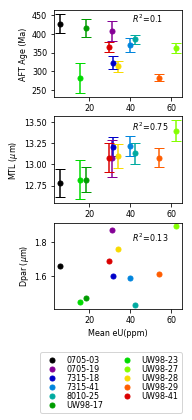

In [8]:
fig, axs = plt.subplots(3,1, figsize=(6/2.5, (23/2)/2.5))

lfs=8
lbp=0
lls=0.00001
ls=8
ms=5
###
ax = axs[0]
for i in np.arange(0,len(samples_wo_0705_12),1):
    ax.errorbar(np.mean(data_tables1.eU_ppm[data_tables1.SampleID==samples_wo_0705_12[i]]),
                data_table2.Central_age_Ma[data_table2.Sample_N==samples_wo_0705_12[i]],
                yerr=data_table2.Central_age_Ma_1s[data_table2.Sample_N==samples_wo_0705_12[i]],
                fmt='o', capsize=5,ms=ms,c=c[i])
ax.text(40, 430, str(' $R^2$=')+str(round(scipy.stats.linregress(xmeaneU_2,yAFT_2)[2]**2,2)), fontsize=lfs)
ax.set_ylabel(ylabel='AFT Age (Ma)', fontdict={'fontsize': ls})
ax.tick_params(axis='both', which='major', labelsize=ls)

ax = axs[1]
for i in np.arange(0,len(samples_wo_0705_12),1):
    ax.errorbar(np.mean(data_tables1.eU_ppm[data_tables1.SampleID==samples_wo_0705_12[i]]),
                data_table2.Mean_track_length_um[data_table2.Sample_N==samples_wo_0705_12[i]],
                yerr=data_table2.Mean_track_length_um_SE[data_table2.Sample_N==samples_wo_0705_12[i]],
                fmt='o', capsize=5,ms=ms,c=c[i])
ax.text(40, 13.4, str(' $R^2$=')+str(round(scipy.stats.linregress(xmeaneU_2,yMTL_2)[2]**2,2)), fontsize=lfs)
ax.set_ylabel('MTL ($\mu$m)', fontdict={'fontsize': ls})
ax.tick_params(axis='both', which='major', labelsize=ls)


ax = axs[2]
#There is no error calculation for Dpar, so that's why I cannot plot the error bars
for i in np.arange(0,len(samples_wo_0705_12),1):
    ax.plot(np.mean(data_tables1.eU_ppm[data_tables1.SampleID==samples_wo_0705_12[i]]),
                data_table2.Dpar_um[data_table2.Sample_N==samples_wo_0705_12[i]],
                'o',ms=ms,c=c[i], label=samples_wo_0705_12[i])
ax.text(40, 1.8, str(' $R^2$=')+str(round(scipy.stats.linregress(xmeaneU_2,yDpar_2)[2]**2,2)), fontsize=lfs)
ax.set_xlabel('Mean eU(ppm)', fontdict={'fontsize': ls})
ax.set_ylabel('Dpar ($\mu$m)', fontdict={'fontsize': ls})
ax.tick_params(axis='both', which='major', labelsize=ls)

#plt.grid()


plt.tight_layout(pad=0)

#ax.legend( ncol=1, fontsize=lfs, labelspacing=lls, loc="best")# loc='best',

ax.legend(bbox_to_anchor=(1, -0.5), ncol=2, fontsize=lfs, labelspacing=lls,  borderaxespad=0)
fig.savefig("AFT_age_&MTL&Dpar_vs_eU_nipy_spectral_wo_0705_12.pdf", dpi=300, bbox_inches="tight")


# Intra-sample correlation, that is a panel for each sample

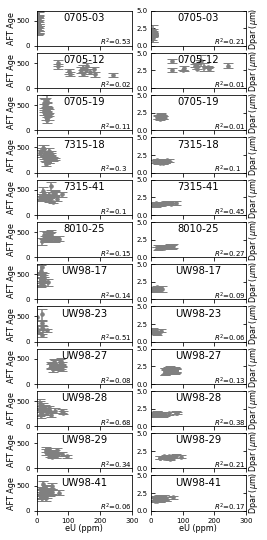

In [9]:
fig, axs = plt.subplots(len(samples_s1),2, figsize=(7.5/2, 23/2.5))
for i in np.arange(0,len(samples_s1),1):
    #Dpar vs eU
    ax = axs[i,0]
    ax.set_title(str(samples_s1[i]), pad=-10, fontsize=10)
    ax.errorbar(data_tables1.eU_ppm[data_tables1.SampleID==samples_s1[i]], data_tables1.Age_Ma[data_tables1.SampleID==samples_s1[i]], yerr=data_tables1.Age_Ma_1s[data_tables1.SampleID==samples_s1[i]], fmt='o', capsize=5, c='grey', ms=3.5)
    slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(data_tables1.eU_ppm[data_tables1.SampleID==samples_t2[i]], data_tables1.Age_Ma_1s[data_tables1.SampleID==samples_t2[i]])
    ax.text(200,0, str('$R^2$=')+
    str(round(r_value**2,2)), size=7)
    ax.set_xlim(0,300)
    ax.set_ylim(0,700)
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.set_ylabel('AFT Age', fontdict={'fontsize': ls}, labelpad=0.1)
    ax.set_xlabel('eU (ppm)', fontdict={'fontsize': ls}, labelpad=0.1)

    
    #AFT vs eU
    ax = axs[i,1]
    ax.set_title(str(samples_s1[i]), pad=-10, fontsize=10)
    ax.errorbar(data_tables1.eU_ppm[data_tables1.SampleID==samples_s1[i]], data_tables1.Dpar_um[data_tables1.SampleID==samples_s1[i]], yerr=data_tables1.Dpar_um_1s[data_tables1.SampleID==samples_s1[i]], fmt='o', capsize=5, c='grey', ms=3.5)
    slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(data_tables1.eU_ppm[data_tables1.SampleID==samples_t2[i]], data_tables1.Dpar_um[data_tables1.SampleID==samples_t2[i]])
    ax.text(200,0, str('$R^2$=')+
    str(round(r_value**2,2)), size=7)
    ax.set_xlim(0,300)
    ax.set_ylim(0,5)
    ax.set_xlabel('eU (ppm)', fontdict={'fontsize': ls}, labelpad=0.1)
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
#fig.tight_layout(pad=0.0001)  # otherwise the right y-label is slightly clipped
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

for i in np.arange(0,len(samples_s1),1):
    ax = axs[i,1]   
    ax.tick_params(axis='y', which='both', direction='in', left=True, labelleft=True, labelright=True)
    ax.set_ylabel('Dpar ($\mu$m)', labelpad=1, fontsize=lfs)
fig.savefig("AFT_age&Dpar_vs_eU_intrasample_datarep.pdf", dpi=300, bbox_inches="tight")


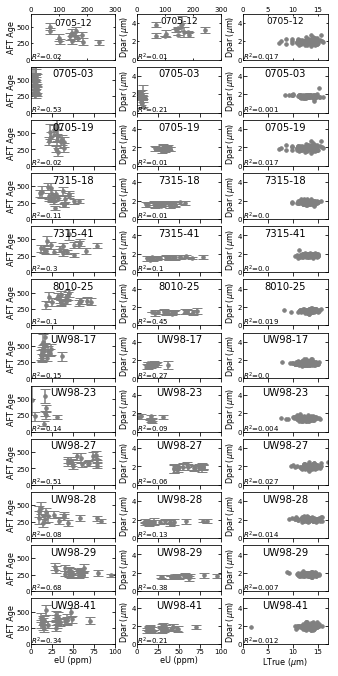

In [10]:
lfs=8
fig, axs = plt.subplots(len(samples_s1),3, figsize=(9/2, 23/2.5))

for i in np.arange(0,len(samples_wo_0705_12),1):
    #AFT vs eU
    ax = axs[i+1,0]
    ax.set_title(str(samples_wo_0705_12[i]), pad=-10, fontsize=10)
    ax.errorbar(data_tables1.eU_ppm[data_tables1.SampleID==samples_wo_0705_12[i]], data_tables1.Age_Ma[data_tables1.SampleID==samples_wo_0705_12[i]], yerr=data_tables1.Age_Ma_1s[data_tables1.SampleID==samples_wo_0705_12[i]], fmt='o', capsize=5, c='grey', ms=3.5)
    slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(data_tables1.eU_ppm[data_tables1.SampleID==samples_t2[i]], data_tables1.Age_Ma_1s[data_tables1.SampleID==samples_t2[i]])
    ax.text(0,0, str('$R^2$=')+
    str(round(r_value**2,2)), size=7)
    ax.set_xlim(0,100)
    ax.set_ylim(0,700)
    ax.tick_params(axis='both', which='major', labelsize=7, labelbottom=False,  right=True)
    #Dpar vs eU
    ax = axs[i+1,1]
    ax.set_title(str(samples_wo_0705_12[i]), pad=-10, fontsize=10)
    ax.errorbar(data_tables1.eU_ppm[data_tables1.SampleID==samples_wo_0705_12[i]], data_tables1.Dpar_um[data_tables1.SampleID==samples_wo_0705_12[i]], yerr=data_tables1.Dpar_um_1s[data_tables1.SampleID==samples_wo_0705_12[i]], fmt='o', capsize=5, c='grey', ms=3.5)
    slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(data_tables1.eU_ppm[data_tables1.SampleID==samples_t2[i]], data_tables1.Dpar_um[data_tables1.SampleID==samples_t2[i]])
    ax.text(0,0, str('$R^2$=')+
    str(round(r_value**2,2)), size=7)
    ax.set_xlim(0,100)
    ax.set_ylim(0,5)
    ax.tick_params(axis='both', which='major', labelsize=7, labelbottom=False, labelleft=False, left=False)
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_right()
    #Dpar vs L
    ax = axs[i+1,2]
    ax.set_title(str(samples_wo_0705_12[i]), pad=-10, fontsize=10)
    ax.plot(data_ss1.Ltrue_um[data_ss1.sampleID==samples_wo_0705_12[i]], 
                data_ss1.Average_Dpar_um[data_ss1.sampleID==samples_wo_0705_12[i]], 
                'o',c='grey', ms=3.5)
    ax.text(0,0, str('$R^2$=')+
            str(round(scipy.stats.linregress(data_ss1.Ltrue_um[data_ss1.sampleID==samples_wo_0705_12[i]],
            data_ss1.Average_Dpar_um[data_ss1.sampleID==samples_wo_0705_12[i]])[2]**2,3)), size=7)            
    ax.set_xlim(0,max(data_ss1.Ltrue_um))
    ax.set_ylim(0,5)
    ax.tick_params(axis='both', which='major', labelsize=7, labelbottom=False, labelleft=False, left=False)
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_right()
    
#Adding sample 0705-12 
ax = axs[0,0]
i=1
ax.set_title(str(samples_s1[i]), pad=-12, fontsize=9)
ax.errorbar(data_tables1.eU_ppm[data_tables1.SampleID==samples_s1[i]], data_tables1.Age_Ma[data_tables1.SampleID==samples_s1[i]], yerr=data_tables1.Age_Ma_1s[data_tables1.SampleID==samples_s1[i]], fmt='o', capsize=5, c='grey', ms=3.5)
slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(data_tables1.eU_ppm[data_tables1.SampleID==samples_t2[i]], data_tables1.Age_Ma_1s[data_tables1.SampleID==samples_t2[i]])
ax.text(0,0, str('$R^2$=')+
str(round(r_value**2,2)), size=7)
ax.set_xlim(0,300)
ax.set_ylim(0,700)
ax.tick_params(axis='both', which='major', labelsize=7, labelbottom=False, labeltop=True, top=True, right=True,  direction='in', length=2, pad=1)

ax = axs[0,1]
ax.set_title(str(samples_s1[i]), pad=-10, fontsize=9)
ax.errorbar(data_tables1.eU_ppm[data_tables1.SampleID==samples_s1[i]], data_tables1.Dpar_um[data_tables1.SampleID==samples_s1[i]], yerr=data_tables1.Dpar_um_1s[data_tables1.SampleID==samples_s1[i]], fmt='o', capsize=5, c='grey', ms=3.5)
slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(data_tables1.eU_ppm[data_tables1.SampleID==samples_t2[i]], data_tables1.Dpar_um[data_tables1.SampleID==samples_t2[i]])
ax.text(0,0, str('$R^2$=')+
str(round(r_value**2,2)), size=7)
ax.set_xlim(0,300)
ax.set_ylim(0,5)
ax.tick_params(axis='both', which='major', labelsize=7, labelbottom=False, labeltop=True, top=True, right=True,  direction='in', length=2, pad=1, )

ax=axs[0,2]
ax.set_title(str(samples_s1[i]), pad=-10, fontsize=9)
ax.plot(data_ss1.Ltrue_um[data_ss1.sampleID==samples_wo_0705_12[i]], 
            data_ss1.Average_Dpar_um[data_ss1.sampleID==samples_wo_0705_12[i]], 
            'o',c='grey', ms=3.5)
ax.text(0,0, str('$R^2$=')+
        str(round(scipy.stats.linregress(data_ss1.Ltrue_um[data_ss1.sampleID==samples_wo_0705_12[i]],
        data_ss1.Average_Dpar_um[data_ss1.sampleID==samples_wo_0705_12[i]])[2]**2,3)), size=7)            
ax.set_xlim(0,max(data_ss1.Ltrue_um))
ax.set_ylim(0,5)
ax.tick_params(axis='both', which='major', labelsize=7, labelbottom=False, labeltop=True, top=True, right=True,  direction='in', length=2, pad=1)

ylabel=['AFT Age', 'Dpar ($\mu$m)', 'Dpar ($\mu$m)']#This was just in case I had to differenciate between Dpar and average Dpar
for i in np.arange(0,len(samples_s1),1):
    for j in np.arange(0,3,1):
        ax = axs[i,j]   
        ax.tick_params(axis='y', which='both', direction='in', left=True, labelleft=True, pad=1)
        ax.set_ylabel(ylabel[j], labelpad=0.01, fontsize=lfs)

xlabel=['eU (ppm)', 'eU (ppm)','LTrue ($\mu$m)']#This was just in case I had to differenciate between Dpar and average Dpar
for j in np.arange(0,3,1):
    ax = axs[len(samples_s1)-1,j]
    ax.tick_params(axis='both', which='major', labelsize=7,labelbottom=True, pad=1)
    ax.set_xlabel(xlabel[j], labelpad=1, fontsize=lfs )

fig.tight_layout(pad=0.01)  # otherwise the right y-label is slightly clipped
fig.subplots_adjust(wspace = 0.25)
fig.savefig("AFT_age&Dpar_vs_eU_intrasample_datarep.pdf", dpi=300)


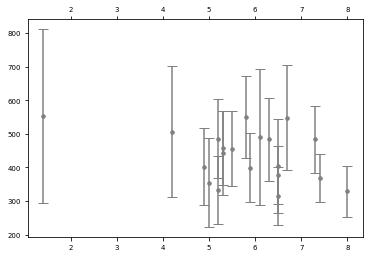

In [11]:
##### Checking individual samples in separate plots
i=0
plt.errorbar(data_tables1.eU_ppm[data_tables1.SampleID==samples_wo_0705_12[i]], data_tables1.Age_Ma[data_tables1.SampleID==samples_wo_0705_12[i]], yerr=data_tables1.Age_Ma_1s[data_tables1.SampleID==samples_wo_0705_12[i]], fmt='o', capsize=5, c='grey', ms=3.5)
# plt.xlim(0,100)
# plt.ylim(0,700)
plt.tick_params(axis='both', which='major', labelsize=7, labeltop=True, top=True)


In [12]:
# As the correlation coefficient

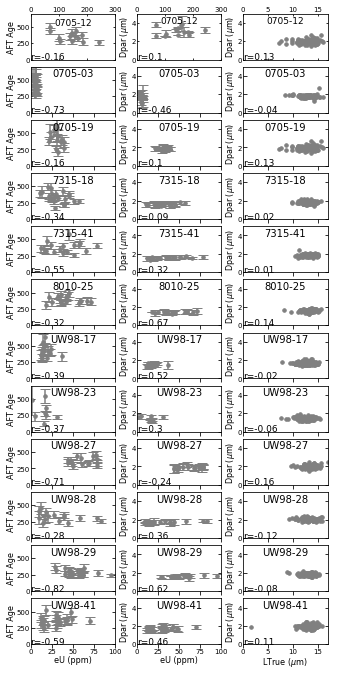

In [19]:
lfs=8
rs=9
fig, axs = plt.subplots(len(samples_s1),3, figsize=(9/2, 23/2.5))

for i in np.arange(0,len(samples_wo_0705_12),1):
    #AFT vs eU
    ax = axs[i+1,0]
    ax.set_title(str(samples_wo_0705_12[i]), pad=-10, fontsize=10)
    ax.errorbar(data_tables1.eU_ppm[data_tables1.SampleID==samples_wo_0705_12[i]], data_tables1.Age_Ma[data_tables1.SampleID==samples_wo_0705_12[i]], yerr=data_tables1.Age_Ma_1s[data_tables1.SampleID==samples_wo_0705_12[i]], fmt='o', capsize=5, c='grey', ms=3.5)
    slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(data_tables1.eU_ppm[data_tables1.SampleID==samples_t2[i]], data_tables1.Age_Ma_1s[data_tables1.SampleID==samples_t2[i]])
    ax.text(0,0, str('r=')+
    str(round(r_value,2)), size=rs)
    ax.set_xlim(0,100)
    ax.set_ylim(0,700)
    ax.tick_params(axis='both', which='major', labelsize=7, labelbottom=False,  right=True)
    #Dpar vs eU
    ax = axs[i+1,1]
    ax.set_title(str(samples_wo_0705_12[i]), pad=-10, fontsize=10)
    ax.errorbar(data_tables1.eU_ppm[data_tables1.SampleID==samples_wo_0705_12[i]], data_tables1.Dpar_um[data_tables1.SampleID==samples_wo_0705_12[i]], yerr=data_tables1.Dpar_um_1s[data_tables1.SampleID==samples_wo_0705_12[i]], fmt='o', capsize=5, c='grey', ms=3.5)
    slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(data_tables1.eU_ppm[data_tables1.SampleID==samples_t2[i]], data_tables1.Dpar_um[data_tables1.SampleID==samples_t2[i]])
    ax.text(0,0, str('r=')+
    str(round(r_value,2)), size=rs)
    ax.set_xlim(0,100)
    ax.set_ylim(0,5)
    ax.tick_params(axis='both', which='major', labelsize=7, labelbottom=False, labelleft=False, left=False)
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_right()
    #Dpar vs L
    ax = axs[i+1,2]
    ax.set_title(str(samples_wo_0705_12[i]), pad=-10, fontsize=10)
    ax.plot(data_ss1.Ltrue_um[data_ss1.sampleID==samples_wo_0705_12[i]], 
                data_ss1.Average_Dpar_um[data_ss1.sampleID==samples_wo_0705_12[i]], 
                'o',c='grey', ms=3.5)
    ax.text(0,0, str('r=')+
            str(round(scipy.stats.linregress(data_ss1.Ltrue_um[data_ss1.sampleID==samples_wo_0705_12[i]],
            data_ss1.Average_Dpar_um[data_ss1.sampleID==samples_wo_0705_12[i]])[2],2)), size=rs)            
    ax.set_xlim(0,max(data_ss1.Ltrue_um))
    ax.set_ylim(0,5)
    ax.tick_params(axis='both', which='major', labelsize=7, labelbottom=False, labelleft=False, left=False)
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_right()
    
#Adding sample 0705-12 
ax = axs[0,0]
i=1
ax.set_title(str(samples_s1[i]), pad=-12, fontsize=9)
ax.errorbar(data_tables1.eU_ppm[data_tables1.SampleID==samples_s1[i]], data_tables1.Age_Ma[data_tables1.SampleID==samples_s1[i]], yerr=data_tables1.Age_Ma_1s[data_tables1.SampleID==samples_s1[i]], fmt='o', capsize=5, c='grey', ms=3.5)
slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(data_tables1.eU_ppm[data_tables1.SampleID==samples_t2[i]], data_tables1.Age_Ma_1s[data_tables1.SampleID==samples_t2[i]])
ax.text(0,0, str('r=')+
str(round(r_value,2)), size=rs)
ax.set_xlim(0,300)
ax.set_ylim(0,700)
ax.tick_params(axis='both', which='major', labelsize=7, labelbottom=False, labeltop=True, top=True, right=True,  direction='in', length=2, pad=1)

ax = axs[0,1]
ax.set_title(str(samples_s1[i]), pad=-10, fontsize=9)
ax.errorbar(data_tables1.eU_ppm[data_tables1.SampleID==samples_s1[i]], data_tables1.Dpar_um[data_tables1.SampleID==samples_s1[i]], yerr=data_tables1.Dpar_um_1s[data_tables1.SampleID==samples_s1[i]], fmt='o', capsize=5, c='grey', ms=3.5)
slope, intercept, r_value, p_value, std_err=scipy.stats.linregress(data_tables1.eU_ppm[data_tables1.SampleID==samples_t2[i]], data_tables1.Dpar_um[data_tables1.SampleID==samples_t2[i]])
ax.text(0,0, str('r=')+
str(round(r_value,2)), size=rs)
ax.set_xlim(0,300)
ax.set_ylim(0,5)
ax.tick_params(axis='both', which='major', labelsize=7, labelbottom=False, labeltop=True, top=True, right=True,  direction='in', length=2, pad=1, )

ax=axs[0,2]
ax.set_title(str(samples_s1[i]), pad=-10, fontsize=9)
ax.plot(data_ss1.Ltrue_um[data_ss1.sampleID==samples_wo_0705_12[i]], 
            data_ss1.Average_Dpar_um[data_ss1.sampleID==samples_wo_0705_12[i]], 
            'o',c='grey', ms=3.5)
ax.text(0,0, str('r=')+
        str(round(scipy.stats.linregress(data_ss1.Ltrue_um[data_ss1.sampleID==samples_wo_0705_12[i]],
        data_ss1.Average_Dpar_um[data_ss1.sampleID==samples_wo_0705_12[i]])[2],2)), size=rs)            
ax.set_xlim(0,max(data_ss1.Ltrue_um))
ax.set_ylim(0,5)
ax.tick_params(axis='both', which='major', labelsize=7, labelbottom=False, labeltop=True, top=True, right=True,  direction='in', length=2, pad=1)

ylabel=['AFT Age', 'Dpar ($\mu$m)', 'Dpar ($\mu$m)']#This was just in case I had to differenciate between Dpar and average Dpar
for i in np.arange(0,len(samples_s1),1):
    for j in np.arange(0,3,1):
        ax = axs[i,j]   
        ax.tick_params(axis='y', which='both', direction='in', left=True, labelleft=True, pad=1)
        ax.set_ylabel(ylabel[j], labelpad=0.01, fontsize=lfs)

xlabel=['eU (ppm)', 'eU (ppm)','LTrue ($\mu$m)']#This was just in case I had to differenciate between Dpar and average Dpar
for j in np.arange(0,3,1):
    ax = axs[len(samples_s1)-1,j]
    ax.tick_params(axis='both', which='major', labelsize=7,labelbottom=True, pad=1)
    ax.set_xlabel(xlabel[j], labelpad=1, fontsize=lfs )

fig.tight_layout(pad=0.01)  # otherwise the right y-label is slightly clipped
fig.subplots_adjust(wspace = 0.25)
fig.savefig("AFT_age&Dpar_vs_eU_intrasample_correlation_coeff_datarep.pdf", dpi=300)
